## Machine Learning, week 10 notebook: Regression

This notebook is a slightly adapted version from the notebook *Chapter 10 - Predicting Continuous Target Variables with Regression Analysis* from Sebastian Raschka's excellent book [Python Machine Learning](http://is.gd/ULX1Ee).

In addition to the modules we grew common to, we additionally import the [Seaborn module](http://stanford.edu/~mwaskom/software/seaborn/index.html). From its website: "Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics."
Seaborn is especially useful to do some preliminary, visually, statistics oriented exploratory data analysis. It is often used in combination with the stats module. In this notebook,however, we will use it without stats.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will use the [housing dataset](http://archive.ics.uci.edu/ml/datasets/Housing) as our regression source. De dataset has the following features:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
</pre>

In [2]:
# Downloaded the data so its local for performance improvement
df = pd.read_csv('..\ML\ML05\housing.data', header=None, sep='\s+')
df.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


MEDV is our target value. In contrast to the discrete, categorical targets, or class targets (values belonging to a restricted set of values) we saw before, MEDV is a continuous target variable. To predict its value we will use a regressor, rather than a classifier.
In the [scatterplot matrix](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) below we set some feature variables against our target variable. As we want to apply a linear regression model, we are looking for a linear relation between any feature variable and our target variable.
Can you identify a candidate?

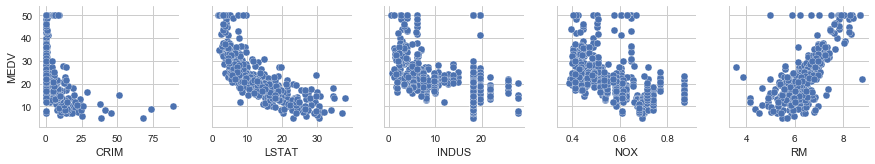

In [3]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, x_vars=['CRIM', 'LSTAT', 'INDUS', 'NOX', 'RM'], y_vars=['MEDV'], size=2.5);
plt.show()

Another way to look at possible strong relationships between any feature varaible and our target variable is to look at correlations. We wil use the [Pearson product-moment correlation](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) to analyse a possible correlation. Correlation is a value between -1 and 1. -1 for a strong negative relation, 0 for no relation at all and 1 for a strong positive relation.
We will use a heatmap to visualize the correlation. There is a lot of noise in this heatmap. In fact, we are only interested in the first 5 cells of the last row as we are only interested in a correlation with our target variable. Can you come up with a better visualization for correlation? Perhaps a plain bar chart?

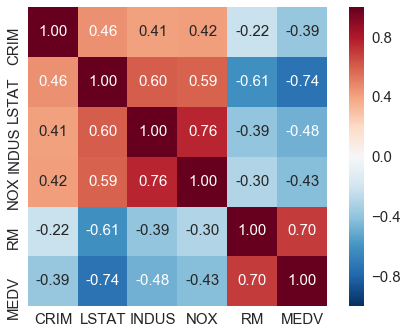

In [4]:
cols = ['CRIM', 'LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
cm = np.corrcoef(df[cols].values, rowvar=0)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

We see strong correlations between LSTAT and MEDV and RM and MEDV. As we saw in our scatter plot also a linear relation between RM and MEDV, RM is the feature we pick to base our linear regression model on.

In [5]:
from sklearn.linear_model import LinearRegression

X = df[['RM']].values
y = df['MEDV'].values

slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


We found slope and intercept of our regression line equation. Now let's look at how that line relates to our measures in the selected feature variable.

In [6]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return None

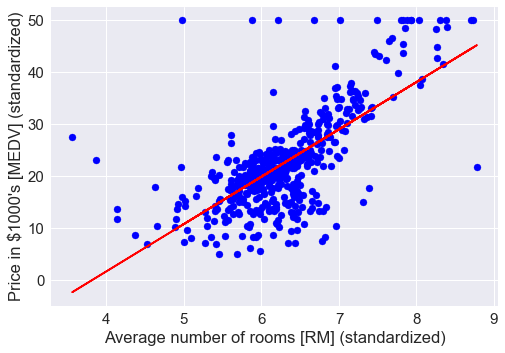

In [7]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

That doesn't look too odd.
What we see is that there are quite a lot outliers: points that aren't really in the thick cloud. There are many statistical techniques to remove outliers from your measures. Instead of using such a technique, we will apply a linear regressor that is less susceptible for outliers: [RANdom SAmple Consensus (RANSAC)](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

In [8]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
    max_trials=100,
    min_samples=50,
    residual_metric=lambda x: np.sum(np.abs(x), axis=1), 
    residual_threshold=5.0, 
    random_state=0)
ransac.fit(X, y)

C:\Users\Uber-Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x0000027FFD2B1510>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

Let's plot what Mr Ransac considered outliers and inliers.

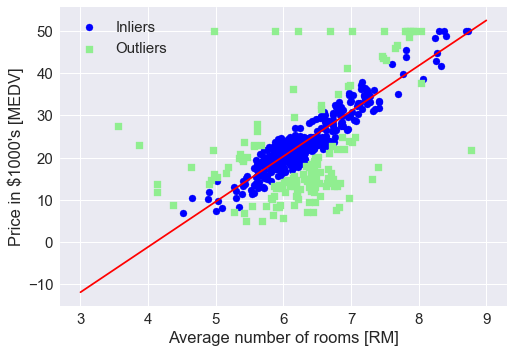

In [9]:
inlier_mask = ransac.inlier_mask_
# outliers = !inliers
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
    c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
    c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

Has this lead to a different slope and intercept? - It has.

In [10]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


In [11]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0
)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

C:\Users\Uber-Laptop\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


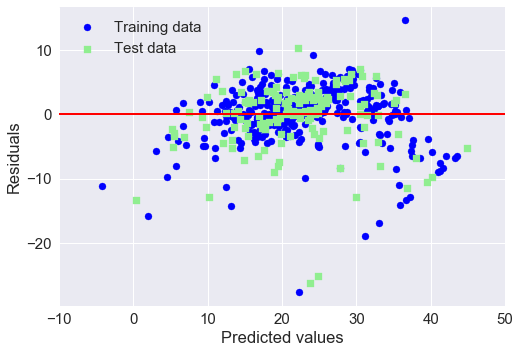

In [12]:
plt.scatter(y_train_pred, y_train_pred - y_train,
    c='blue', marker='o', label='Training data'
)
plt.scatter(y_test_pred,  y_test_pred - y_test,
    c='lightgreen', marker='s', label='Test data'
)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


In [14]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % 
    (r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


### Assignments

1. We only calculated MSE and R^2 for the RANSAC regressor. Calculate both for the standard sklearn linear regressor we used first and compare the results.



2a. Collect for all Fontys courses you have done sofar your grades (target variable).

2b. Also create and rate (from 1 to 10) the following features by answering the questions below:  
    + In which semester did you follow the course?
    + How much fun was it to follow the course?
    + What was the quality of the course?
    + Was it an individual or group assignment?
    + Did you like your classmates?
    
2c. How well do each of these  features correlate with your grade?

2d. Can you predict your end grade for this Machine Learning course?

Optionally: Even if we haven't covered R, you should be able to understand it from a conceptual point of view and be able to use it. Solve the same problem using linear regression with R. You can either use a notebook with R (rather than Python) or use RStudio for your solution.

In [26]:
import pandas as pd

df = pd.read_csv('..\ML\ML05/course_data.csv')
df.head(1)

,course_code,course_name,score,semester,fun,quality,group_members,like_classmates
0,OIM11,Oriëntatie ICT & Media Design,6,1,4,3,1,4
